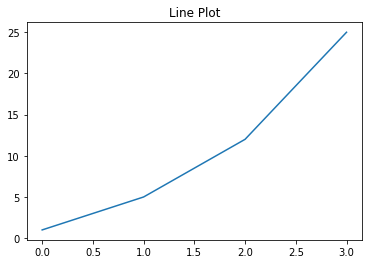

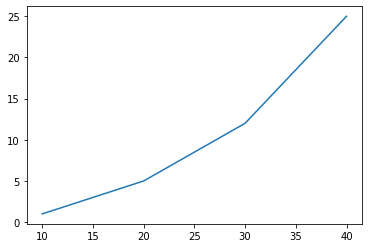

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Line plot(선 그래프)
plt.title('Line Plot') # plot의 제목을 설정
plt.plot([1, 5, 12, 25]) # x축의 자료 위치(x 축 눈금) -> tick은 기본적으로 0, 1, 2, 3
plt.show() # 화면에 plot을 rendering 하고 마우스 이벤트를 기다리는 함수
# 만약 코드를 pycharm과 같은 일반 개발 툴을 이용하면 이 명령어를 이용해야 그래프가 나옮. Jupyter Notebook은 굳이 쓸 필요 없음
plt.plot([10, 20, 30, 40], [1, 5, 12, 25]) # x축 y축

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,2441242,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,28542,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
대구광역시,-,-,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891


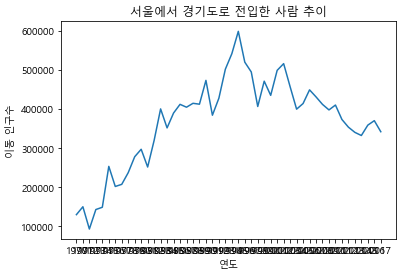

In [45]:
df = pd.read_excel('./data/lineplot_sample_data.xlsx')
# display(df.head())

df = df.fillna(method='ffill') # 전출지별의 NaN 값을 이전 행의 값으로 대체
# display(df.head(25))

# 서울특별시에서 다른 지역으로 전입한 데이터만 가져오자
bool_mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df.loc[bool_mask, :]
# display(df_seoul)

df_seoul.drop('전출지별', axis=1, inplace=True)

df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True) # DataFrame의 column 명을 변경

df_seoul.set_index('전입지', inplace=True) # index를 전입지로 바꿈

display(df_seoul.head(3))

s = df_seoul.loc['경기도'] # 서울에서 경기도로 전입한 데이터만 연도별로 가져오자
# print(s)

# plt.title('seoul -> gyeonggi')
# plt.title('서울에서 경기도로 전입한 사람 추이') # Matplotlib은 한글 지원 안 함. font가 필요함!

import matplotlib as mpl # font 잡는데 필요한 모듈 불러오기
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc

font_path = './font/malgun.ttf' # ttf 파일을 jupyter notebook 디렉터리 안에 넣기
font_name = fm.FontProperties(fname=font_path).get_name() # fm으로 font 이름 알아오기
# print(font_name) # Malgun Gothic
rc('font', family=font_name) # family는 font를 지칭함

plt.title('서울에서 경기도로 전입한 사람 추이')

import warnings          # 원본 DataFrame을 변경하는 것에 대한 경고문 안 나오게
warnings.filterwarnings(action='ignore')

mpl.rcParams['axes.unicode_minus'] = False # 그래프에서 '-' 기호 때문에 발생하는 문제 방지하기 위한 설정

plt.xlabel('연도')
plt.ylabel('이동 인구수')

plt.plot(s.index, s.values) # Line plot의 x축 y축을 인덱스와 컬럼 값으로 지정
plt.show()

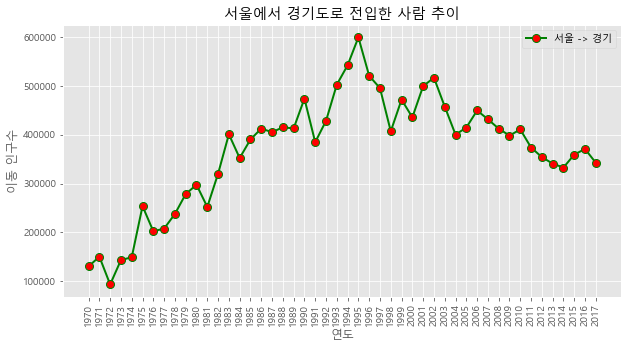

In [50]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc
import warnings

warnings.filterwarnings(action='ignore')

mpl.rcParams['axes.unicode_minus'] = False

font_path = './font/malgun.ttf'
font_name = fm.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

plt.style.use('ggplot')         # 그래프에 스타일(ggplot)을 적용
plt.figure(figsize=(10, 5))     # 그래프의 크기를 설정. figsize 옵션으로 가로/세로 길이(inch)를 지정

plt.xticks(rotation='vertical') # x의 눈금을 읽기 어렵기 때문에 label을 회전시킴

plt.plot(s.index, s.values,
         marker='o', markersize=8, markerfacecolor='r', # marker를 circle로 지정, s는 square. size는 크기, facecolor는 색
         color='g', linewidth=2) # color는 선의 색, linewidth는 선 굵기

plt.title('서울에서 경기도로 전입한 사람 추이')
plt.xlabel('연도')
plt.ylabel('이동 인구수')

plt.legend(labels=['서울 -> 경기'], loc='best') # 범례. loc는 위치 알아서

plt.show()

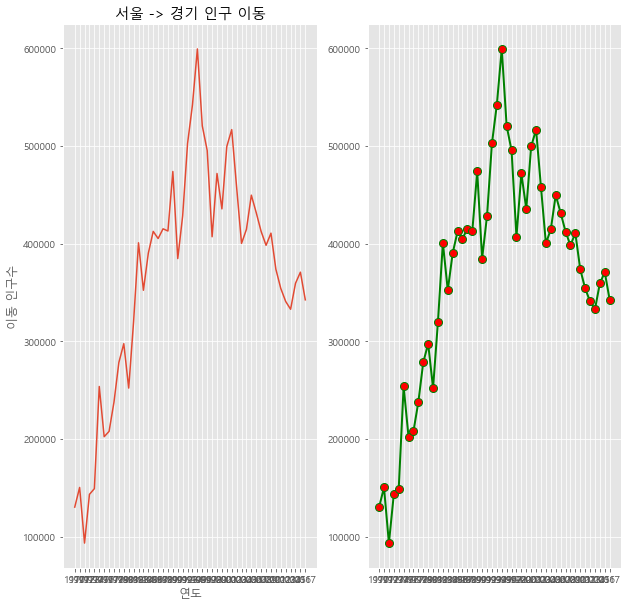

In [4]:
# 그래프 여러개를 한번에 그리는 방법인 sub-plot
# figure, axes, axis
# figure는 canvas(도화지)를 나타내는 객체. plot()을 사용하면 자동으로 figure 만듦. plt.figure()로 크기 설정 가능
# figure 객체는 1개 이상의 axes로 구성됨. plot()이 자동으로 1개 만듦. sub-plot으로 여러개 만들 수 있음
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
from matplotlib import rc
import warnings

warnings.filterwarnings(action='ignore')

mpl.rcParams['axes.unicode_minus'] = False

font_path = './font/malgun.ttf'
font_name = fm.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

plt.style.use('ggplot')

df = pd.read_excel('./data/lineplot_sample_data.xlsx')
df = df.fillna(method='ffill')
bool_mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df.loc[bool_mask, :]
df_seoul.drop('전출지별', axis=1, inplace=True)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)
s = df_seoul.loc['경기도']

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(1,2,1) # .add_subplot(행, 열, axes). axes 추가. 1행 2열의 첫번째 axes
ax2 = fig.add_subplot(1,2,2) # 1행 2열의 두번째 axes

ax1.set_title('서울 -> 경기 인구 이동')
ax1.set_xlabel('연도')
ax1.set_ylabel('이동 인구수')
ax1.plot(s.index, s.values)

ax2.plot(s.index, s.values, marker='o', markersize=8, markerfacecolor='r', color='g', linewidth=2)

plt.show()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite


46.6 9.0


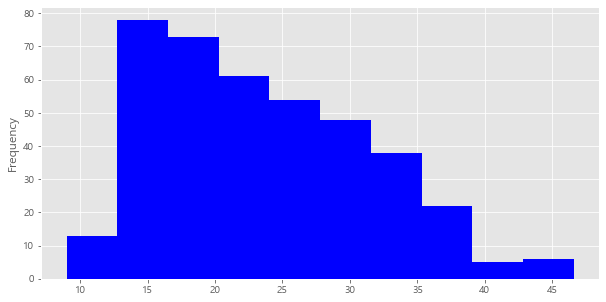

In [26]:
# Histogram(도수표) : 단변수(변수가 하나) 데이터의 빈도수를 그래프로 표현한 것
# x축을 같은 크기의 여러 구간(bin)으로 나누고, y축은 해당 구간 안에 포함된 데이터의 개수(빈도, mode)를 표현
# 당연히 x축의 구간을 조절하면 도수표의 모양이 달라짐
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

df = pd.read_csv('./data/auto-mpg.csv', header=None)
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin', 'name']

display(df.head(3))
print(df['mpg'].max(), df['mpg'].min())

# mpl이 아닌 Pandas의 기능을 이용해서 도수표를 그려보자
df['mpg'].plot(kind='hist', bins=10, color='blue', figsize=(10,5)) # kind=차트의 종류. bins=구간 

plt.show()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite


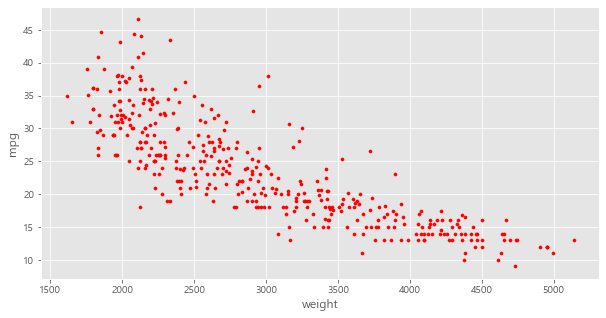

In [27]:
# Scatter(산점도) : 서로 다른 두 변수 사이의 관계를 표현
# 두 변수의 값을 각각 x와 y축에 하나씩 놓고 데이터 값이 위치하는 좌표(x,y)를 찾아서 점을 찍음
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

df = pd.read_csv('./data/auto-mpg.csv', header=None)
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin', 'name']

display(df.head(3))

df.plot(kind='scatter', x= 'weight', y= 'mpg', # kind=산점도, x축, y축
        color='r', s=10, figsize=(10,5)) # 점의 색, 점의 크기
plt.show()

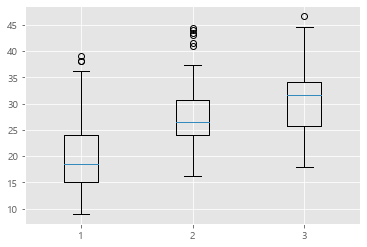

In [44]:
# Box plot : 4분위 값을 이용. 데이터의 분포를 확인할 수 있음. outlier(이상치)가 그래프에 표현됨
# 1분위 값은 전체 범위에서 25%, 2분위(중위) 값은 50%, 3분위 값은 75%
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./data/auto-mpg.csv', header=None)
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin', 'name']

plt.boxplot(x=[df.loc[df['origin'] == 1, 'mpg'],
                df.loc[df['origin'] == 2, 'mpg'],
                df.loc[df['origin'] == 3, 'mpg']])
plt.show()

In [53]:
# 데이터 시각화를 끝내고, 기술통계로 넘어간다!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./data/student_sports_test.csv',
                index_col='학생번호') # 지정 인덱스
display(df)
print(df.shape) # (10, 5). 10행 5열(변수, 차원) 데이터. 지정 인덱스로 학생번호를 빼주지 않으면, 6변수


,학년,악력,윗몸일으키기,점수,순위
학생번호,,,,,
1,1,40.2,34,15,4
2,1,34.2,14,7,10
3,1,28.8,27,11,7
4,2,39.0,27,14,5
5,2,50.9,32,17,2
6,2,36.5,20,9,9
7,3,36.6,31,13,6
8,3,49.2,37,18,1
9,3,26.0,28,10,8


(10, 5)


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./data/student_scores_em.csv',
                index_col='student number')
# display(df)

scores = df['english'][:10] # 영어 성적 상위 10개만 슬라이싱

scores_df = pd.DataFrame(scores)
display(scores_df)



,english
student number,
1,42
2,69
3,56
4,41
5,57
6,48
7,65
8,49
9,65
